In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'Resources/crypto_market_data.csv'

In [ ]:
# Generate summary statistics
market_data_df.describe()

### Prepare the Data

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_scaled_market_data = StandardScaler().fit_transform(market_data_df)

print(df_scaled_market_data)

In [7]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame (df_scaled_market_data,columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_df["coin_id"]= market_data_df.index

# Set the coinid column as index
scaled_df= scaled_df.set_index("coin_id")

# Display sample data
scaled_df.head()

NameError: name 'df_scaled_market_data' is not defined

### Find the Best Value for k Using the Original Scaled DataFrame.

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values= list(range(1,11))

# Create an empty list to store the inertia values
inertia_values= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    model= KMeans( n_clusters=i,init='k-means++',random_state=1)
    model.fit(scaled_df)
    inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_dict={'k':k_values,
           'inertia':inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df= pd.DataFrame(elbow_dict)

# Display the DataFrame
elbow_df

In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x='k',y='inertia')

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [3]:
# Initialize the K-Means model using the best value for k
model= KMeans( n_clusters=4,init='k-means++',random_state=1)

In [6]:
# Fit the K-Means model using the scaled data
model.fit(scaled_df)

NameError: name 'scaled_df' is not defined

In [5]:
# Predict the clusters to group the cryptocurrencies using the sc =aled data
model_predict= model.predict(scaled_df)

# View the resulting array of cluster values.
print(model_predict)

NameError: name 'scaled_df' is not defined

In [11]:
# Create a copy of the DataFrame
scaled_prediction_df = scaled_df.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
scaled_prediction_df["clusters_predictions"]= model_predict

# Display sample data
scaled_prediction_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters_predictions
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

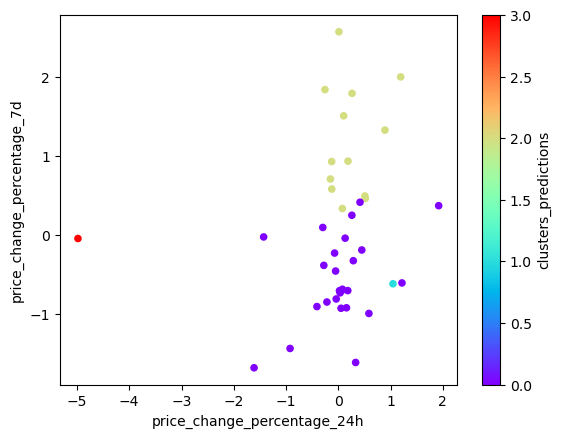

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_prediction_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d",c='clusters_predictions',colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca= PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca_data = pca .fit_transform (scaled_df)

# View the first five rows of the DataFrame. 
market_pca_data [:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [19]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(
    market_pca_data,
    columns=['PCA1', 'PCA2', 'PCA3']
)

# Copy the crypto names from the original data
market_data_pca_df['coin_id']= market_data_df.index

# Set the coinid column as index
market_data_pca_df = market_data_pca_df.set_index('coin_id')

# Display sample data
market_data_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [20]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k=list(range(1,11))

# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model=KMeans(n_clusters=i,n_init='auto',random_state=1)
    model.fit(market_data_pca_df)
    inertia.append(model.inertia_) 

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k':k,
    'inertia':inertia

}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df= pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_pca_df

c:\Users\f_hol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\f_hol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\f_hol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\f_hol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Elbow Curve Using PCA Data'}, xlabel='k'>

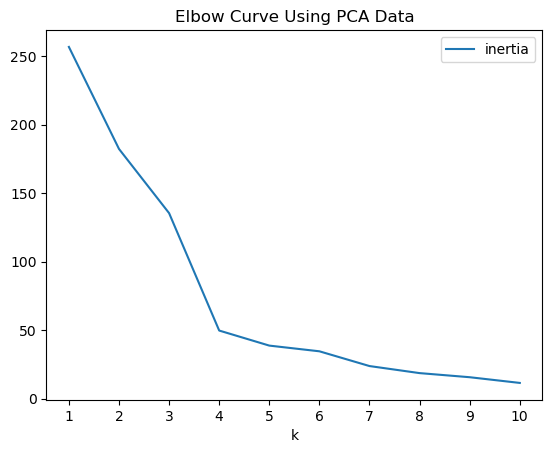

In [21]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = elbow_pca_df.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve Using PCA Data",
    xticks=k)
elbow_plot_pca

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k


In [ ]:
# Fit the K-Means model using the PCA data


In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data


# Print the resulting array of cluster values.


In [23]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

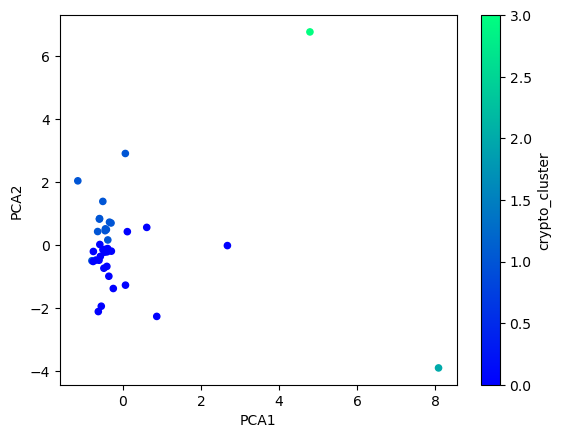

In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 


### Determine the Weights of Each Feature on each Principal Component

In [22]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(
    pca.components_.T, 
    columns=['PCA1', 'PCA2', 'PCA3'], 
    index= scaled_df.columns
    )
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    